<a href="https://colab.research.google.com/github/Nikkiie/Bike-sharing-demand-prediction-Cap-2-/blob/main/Individual_colab_Bike_sharing_demand_prediction_(Capstone_2)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PROJECT TITLE - Seoul Bike Sharing Demand Prediction** 

# **PROJECT SUMMARY:**
 
 **Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.**

 # **Data Description:**

 **Attribute Information:**

  --> Date : year-month-day

  --> Rented Bike count - Count of bikes rented at each hour

  --> Hour - Hour of he day

  --> Temperature-Temperature in Celsius

  --> Humidity - %

  --> Windspeed - m/s

  --> Visibility - 10m

  --> Dew point temperature - Celsius

  --> Solar radiation - MJ/m2

  --> Rainfall - mm

  --> Snowfall - cm

  --> Seasons - Winter, Spring, Summer, Autumn

  --> Holiday - Holiday/No holiday

  --> Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **GitHub Link -**

### Importing Libraries

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
#Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Giving the file path

file_path = ('/content/drive/MyDrive/cap 2/SeoulBikeData (1).csv')
df = pd.read_csv(file_path, encoding = 'ISO-8859-1')

### Dataset First View


In [4]:
# It is a good habit to copy the data for backup
df = df.copy()

In [5]:
# Checking top 5 rows in dataframe
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
# Checking last 5 rows in dataframe
df.tail()

### Dataset Rows & Columns count

In [7]:
# Data shape
df.shape

(8760, 14)

In [8]:
#Check all the coloumns present in our dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# again checking head of dataframe

df.head()

### Dataset Information

In [11]:
# data dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [12]:
# Checking duplicates
print(len(df[df.duplicated()]))

0


#### Missing Values/Null Values

In [13]:
# Missing data counts
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

### Understanding Your Variables

In [14]:
# Statistical information

df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Date,8760,365,01/12/2017,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rented Bike Count,8760.0,NaN,NaN,NaN,704.602055,644.997468,0.0,191.0,504.5,1065.25,3556.0
Hour,8760.0,NaN,NaN,NaN,11.5,6.922582,0.0,5.75,11.5,17.25,23.0
Temperature(°C),8760.0,NaN,NaN,NaN,12.882922,11.944825,-17.8,3.5,13.7,22.5,39.4
Humidity(%),8760.0,NaN,NaN,NaN,58.226256,20.362413,0.0,42.0,57.0,74.0,98.0
Wind speed (m/s),8760.0,NaN,NaN,NaN,1.724909,1.0363,0.0,0.9,1.5,2.3,7.4
Visibility (10m),8760.0,NaN,NaN,NaN,1436.825799,608.298712,27.0,940.0,1698.0,2000.0,2000.0
Dew point temperature(°C),8760.0,NaN,NaN,NaN,4.073813,13.060369,-30.6,-4.7,5.1,14.8,27.2
Solar Radiation (MJ/m2),8760.0,NaN,NaN,NaN,0.569111,0.868746,0.0,0.0,0.01,0.93,3.52
Rainfall(mm),8760.0,NaN,NaN,NaN,0.148687,1.128193,0.0,0.0,0.0,0.0,35.0


### Checking Unique Values

In [15]:
#checking unique values

df.columns.unique()

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

### Data wrangling

In [16]:
# converting date column dtype object to date 

df['Date']=pd.to_datetime(df['Date'])

In [17]:
# splitting day of week, month and year in three column

df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype("object")

In [18]:
# dropping the Date column
df.drop(columns=['Date'],inplace=True)

### EDA

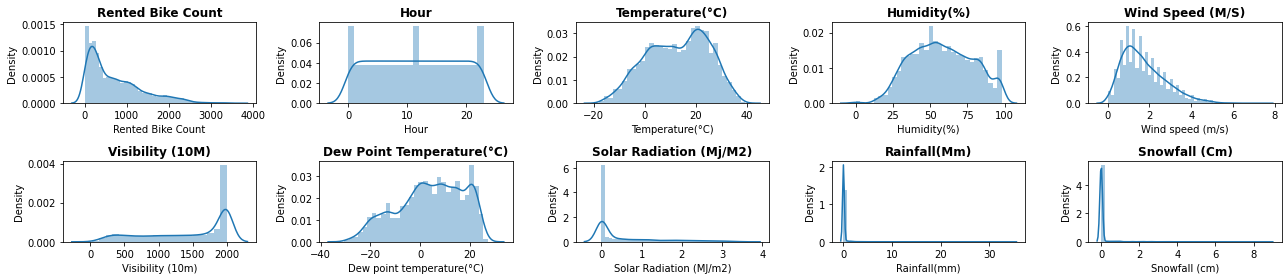

In [19]:
# Visualizing the distributions.
plt.figure(figsize=(18,4))
for n,column in enumerate(df.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.distplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

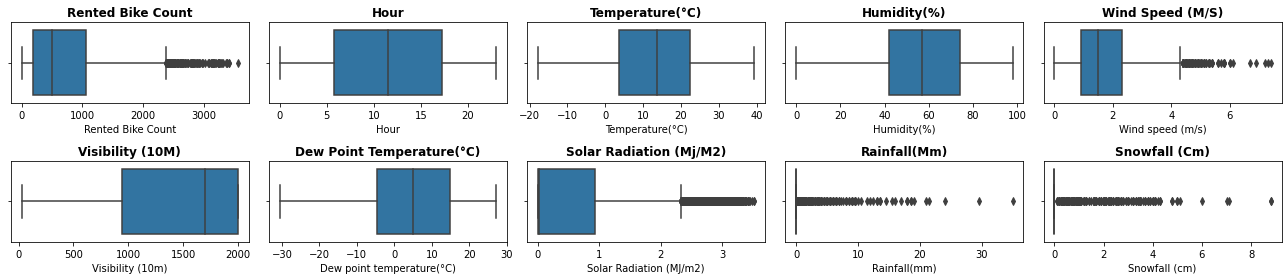

In [20]:
# Checking for outliers
plt.figure(figsize=(18,4))
for n,column in enumerate(df.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.boxplot(df[column])
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [23]:
# converting Hour column integer to Categorical 

df['Hour']=df['Hour'].astype('object')

In [24]:
# Divide Data in categorical and numerical features

numeric_features= df.select_dtypes(exclude='object')
categorical_features=df.select_dtypes(include='object')

Exploring categorical features

In [26]:
categorical_features.head()

,Hour,Seasons,Holiday,Functioning Day,day_of_week,month,year
0,0,Winter,No Holiday,Yes,Thursday,January,2017
1,1,Winter,No Holiday,Yes,Thursday,January,2017
2,2,Winter,No Holiday,Yes,Thursday,January,2017
3,3,Winter,No Holiday,Yes,Thursday,January,2017
4,4,Winter,No Holiday,Yes,Thursday,January,2017


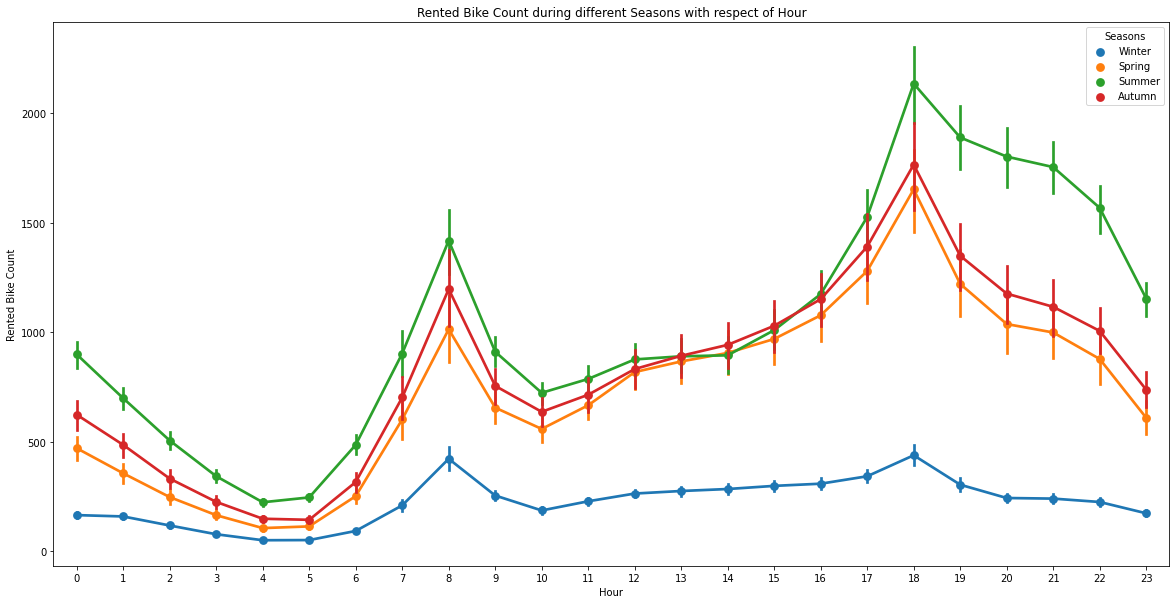

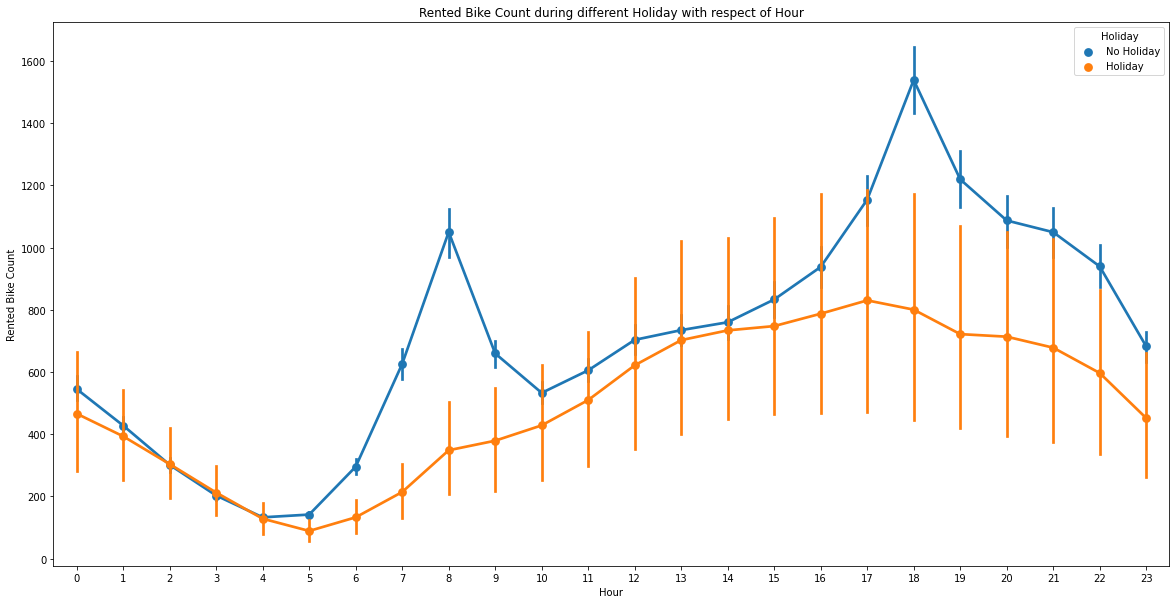

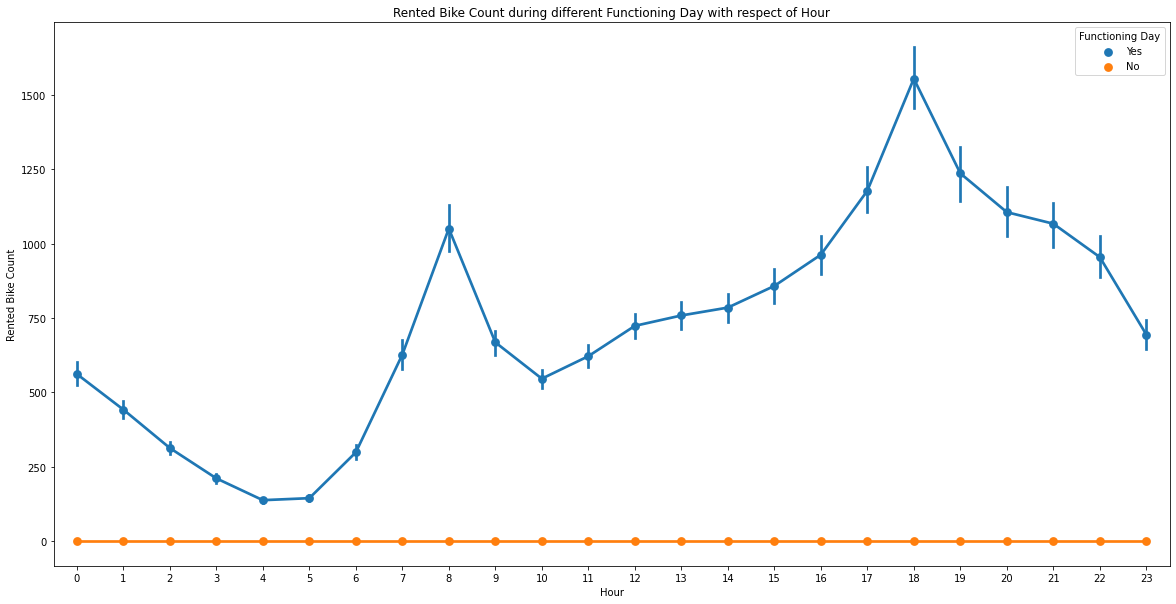

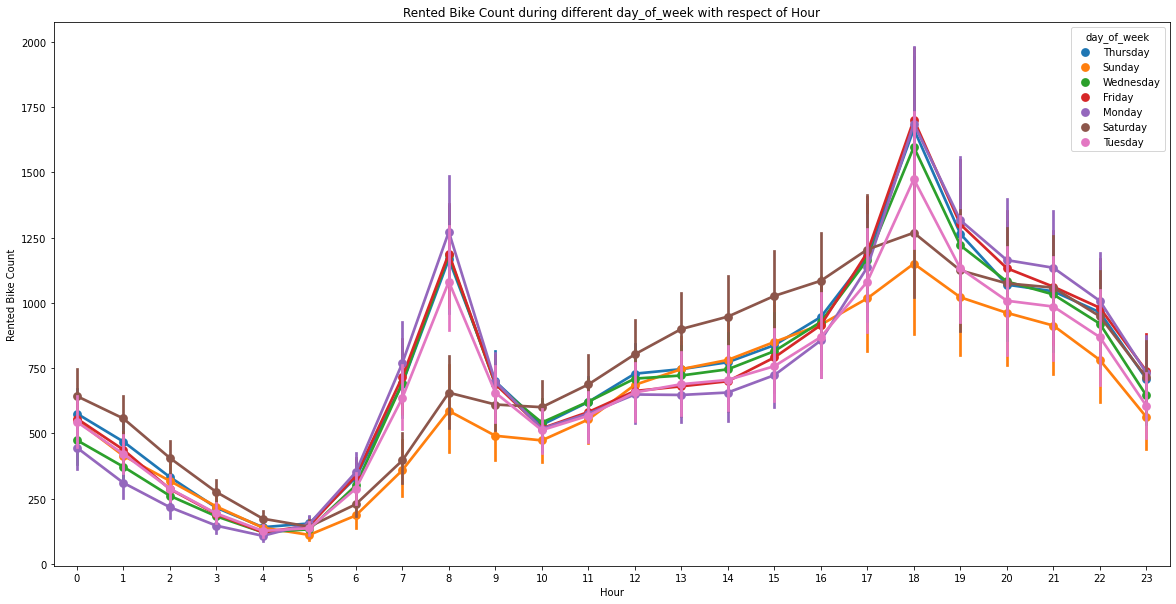

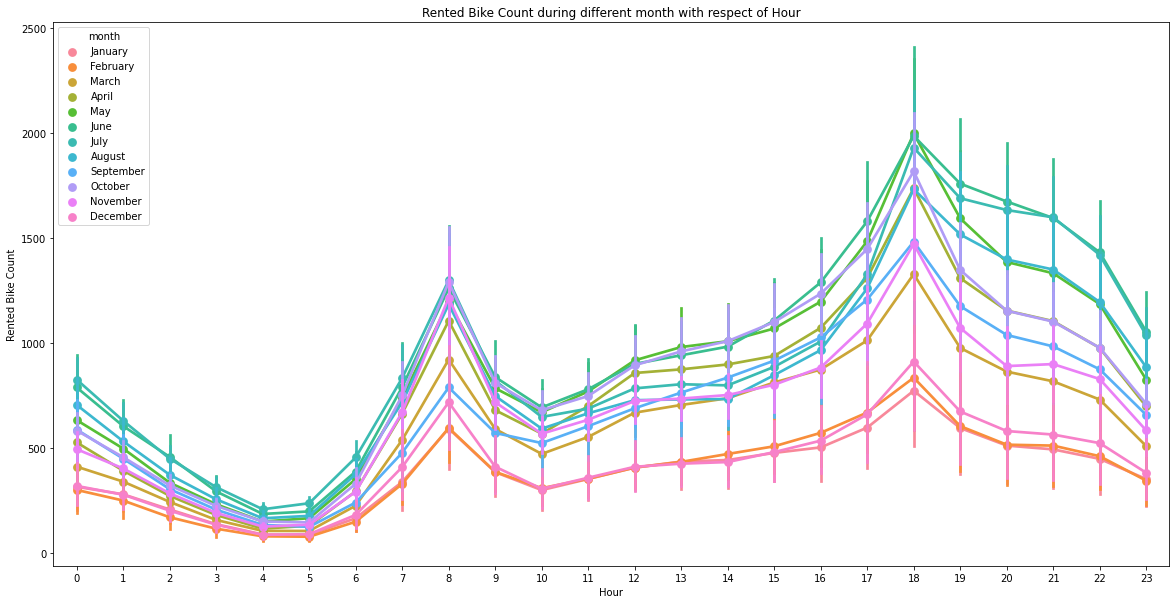

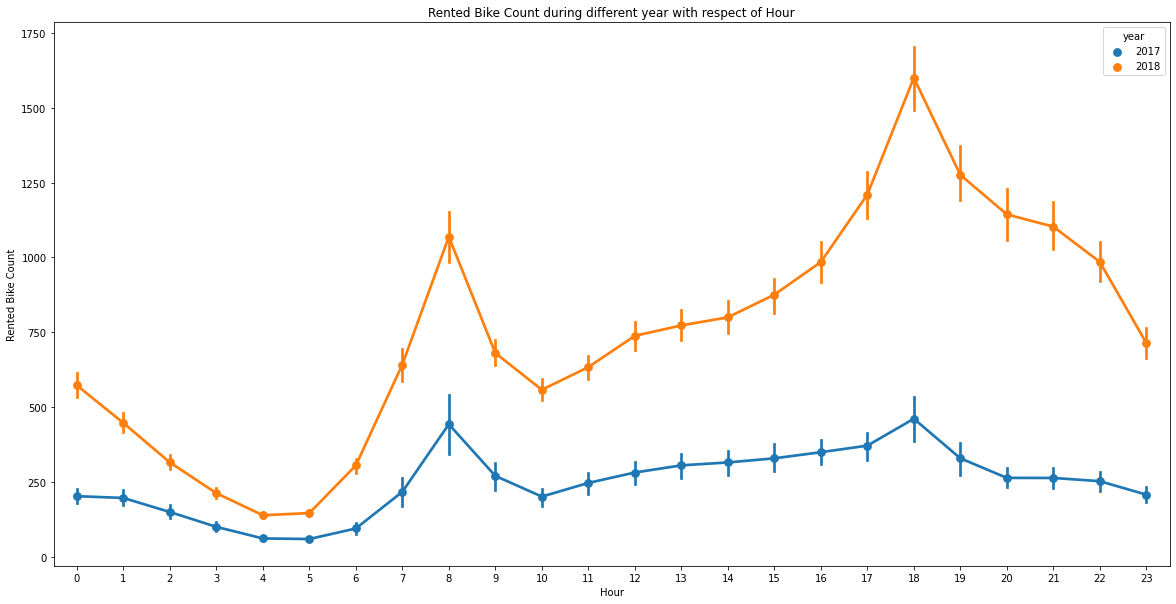

In [27]:
# we create point plots with Rented Bike Count during different categorical features with respect to Hour
for i in categorical_features.columns:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(20,10))
    sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],hue=df[i])
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()

Exploring numerical features

In [30]:
numeric_features.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


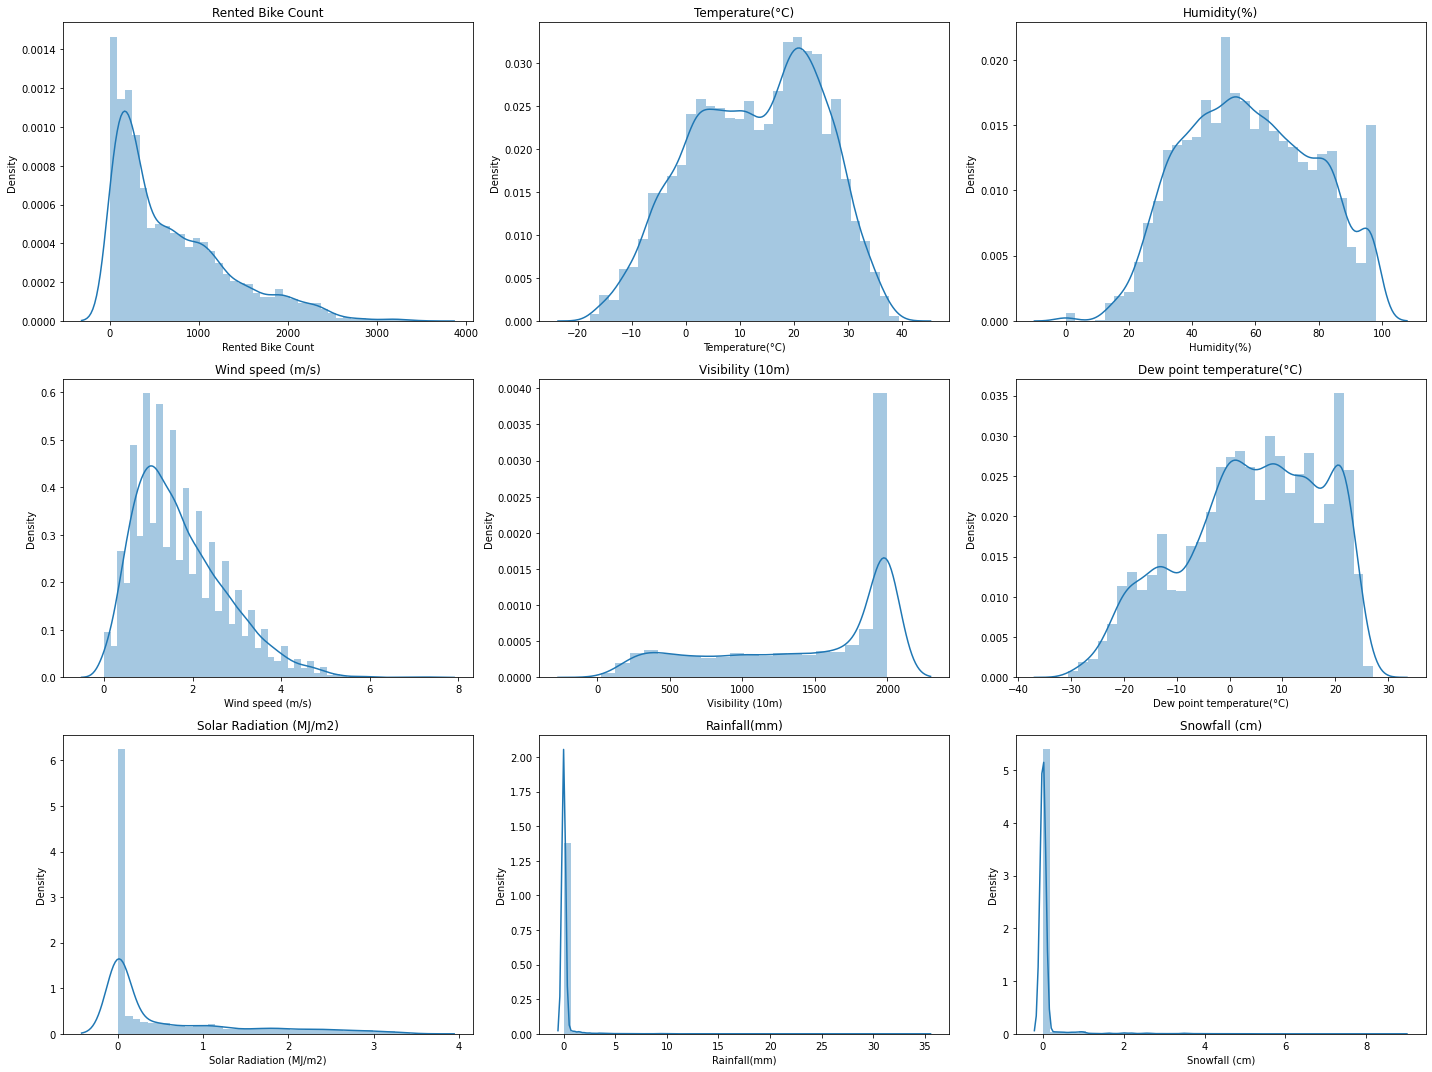

In [36]:
# Distrubution of Data
n=1
plt.figure(figsize=(20,15))
for i in numeric_features.columns:
  plt.subplot(3,3,n)
  n=n+1
  sns.distplot(df[i])
  plt.title(i)
  plt.tight_layout()